In [ ]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu_speed(n_list=[100,500,1000,2000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha1,1), (p_alpha1,4)],
              show_progress=True,
              std=1):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k!=1 else print(f"RCIT (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)



        for i, n in enumerate(n_list):

    
            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"t={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                
                np.random.seed(sed)
                random.seed(sed)

                dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='cauchy',noise_std=std)))
                dataII = np.hstack((generate_samples(n=n,indp='N',z_dis='gaussian',noise_dis='cauchy',noise_std=std)))

                if k == 1:
                    obj_ECIT = ECIT(dataI, rcit, p_ensemble, k=1)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, rcit, p_ensemble, k=1)
                    pII = obj_ECIT([0], [1], [2])
                elif k == 0:

                    ########################################

                    if n <= 6000:

                    ########################################
                    
                        obj_ECIT = ECIT(dataI, kcit, p_ensemble, k=1)
                        pI = obj_ECIT([0], [1], [2])
                        obj_ECIT = ECIT(dataII, kcit, p_ensemble, k=1)
                        pII = obj_ECIT([0], [1], [2])
                    else:
                        pI = 0
                        pII = 0

                elif k<100:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, k)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, k)
                    pII = obj_ECIT([0], [1], [2])
                    
                else:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, int(n/k))
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, int(n/k))
                    pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        if k==0:
            eI, eII, tim = result
            num_ = np.sum(np.array(eI)<1)
            eI = eI[:num_]
            eII = eII[:num_]
            tim = tim[:num_]
            result = [eI, eII, tim]

        key_name = f"Ensemble KCIT (k={k}, {p_ensemble.__name__})" if k != 1 else f"RCIT"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)
        if len(eI) != len(n_list):
            n_list_ = n_list[:len(eI)]
            ax_eI.plot(n_list_, eI, label=label)
            ax_eII.plot(n_list_, eII)
            ax_eSum.plot(n_list_, eSum)
            ax_tim.plot(n_list_, tim)
        else:
            ax_eI.plot(n_list, eI, label=label)
            ax_eII.plot(n_list, eII)
            ax_eSum.plot(n_list, eSum)
            ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 483.99it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [33:32<00:00, 20.13s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [33:11<00:00, 19.91s/it]


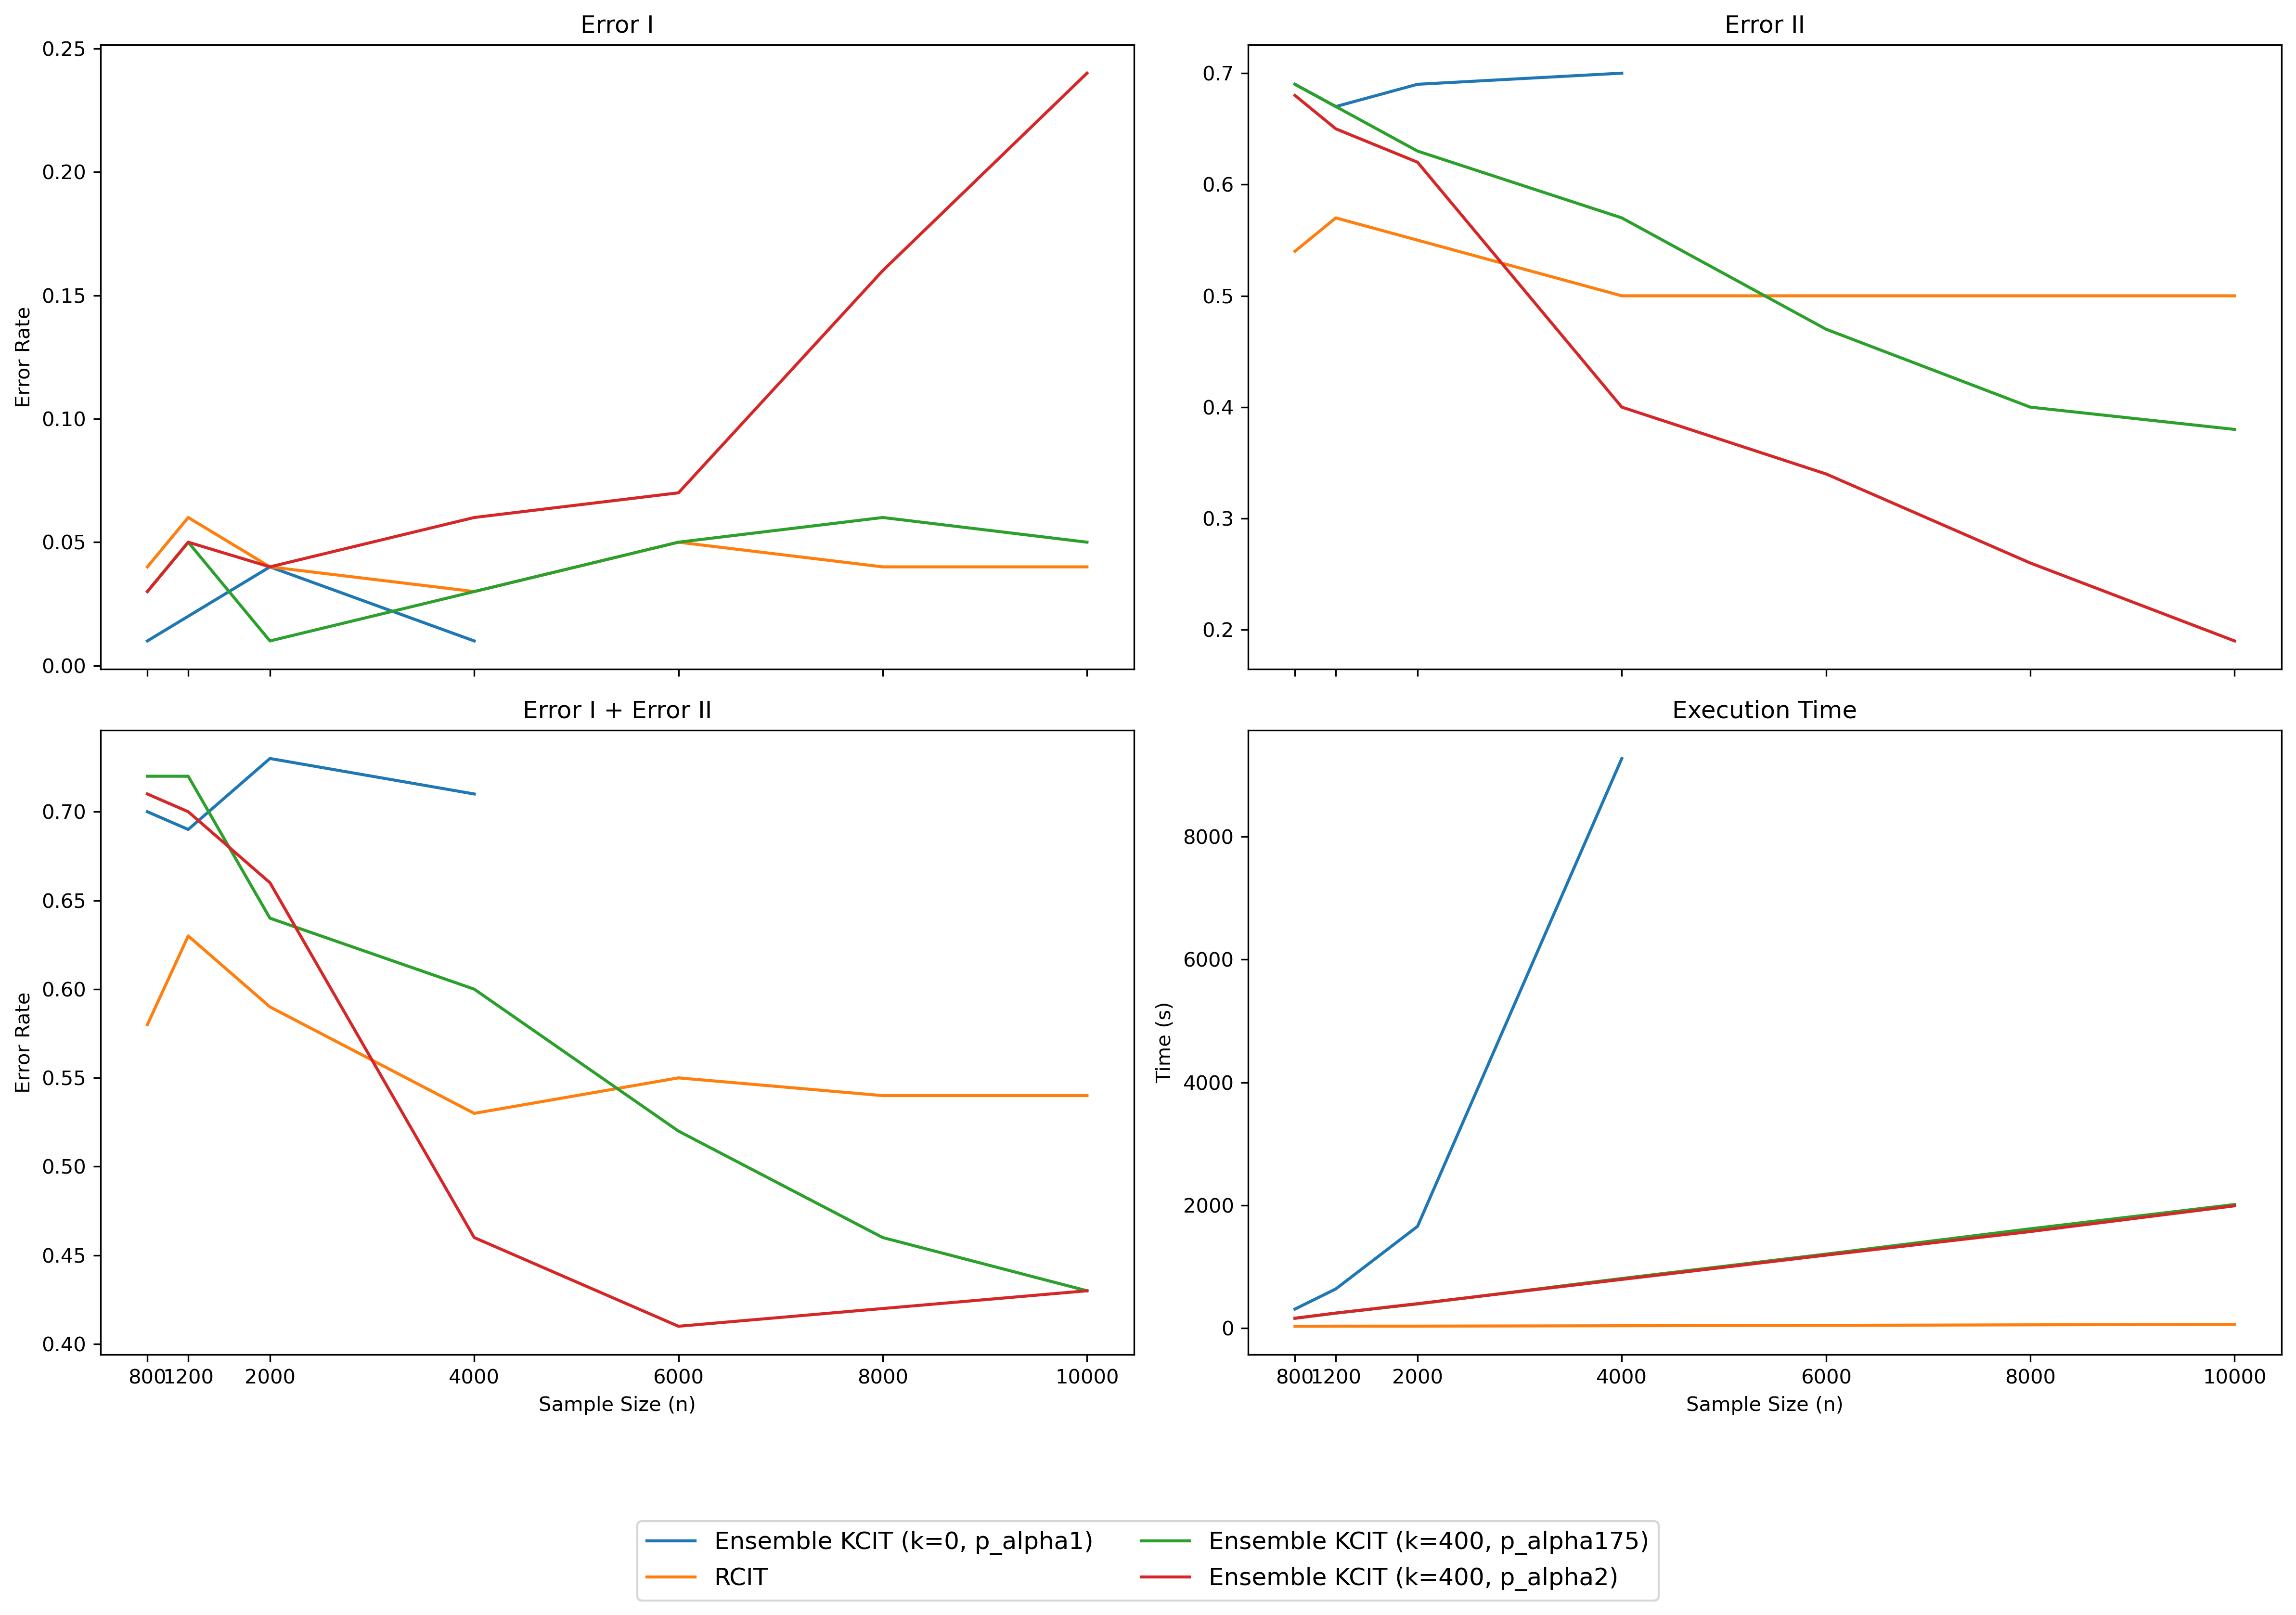

[[[0.01, 0.02, 0.04, 0.01, 1.0, 1.0, 1.0],
  [0.69, 0.67, 0.69, 0.7, 0.0, 0.0, 0.0],
  [310.66916394233704,
   638.8641819953918,
   1657.3171980381012,
   9273.285429000854,
   0.14020705223083496,
   0.2611117362976074,
   0.20743417739868164]],
 [[0.04, 0.06, 0.04, 0.03, 0.05, 0.04, 0.04],
  [0.54, 0.57, 0.55, 0.5, 0.5, 0.5, 0.5],
  [30.84996199607849,
   32.82221603393555,
   33.2836971282959,
   39.03660583496094,
   45.88608121871948,
   54.101813077926636,
   61.39029574394226]],
 [[0.03, 0.05, 0.01, 0.03, 0.05, 0.06, 0.05],
  [0.69, 0.67, 0.63, 0.57, 0.47, 0.4, 0.38],
  [161.9778470993042,
   244.84667992591858,
   394.3269989490509,
   808.6353142261505,
   1205.6336262226105,
   1617.6142508983612,
   2012.6387720108032]],
 [[0.03, 0.05, 0.04, 0.06, 0.07, 0.16, 0.24],
  [0.68, 0.65, 0.62, 0.4, 0.34, 0.26, 0.19],
  [161.0470380783081,
   245.72864890098572,
   398.9933559894562,
   793.3609988689423,
   1188.773244857788,
   1572.7818989753723,
   1991.4353330135345]]]

In [13]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=1)
show_results(results, ensembles, n_list)
results

In [ ]:
ensembles = [(p_alpha1,0)]

n_list = [6000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=1)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 485.93it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:02<00:00,  1.61it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [31:20<00:00, 18.80s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [30:33<00:00, 18.33s/it]


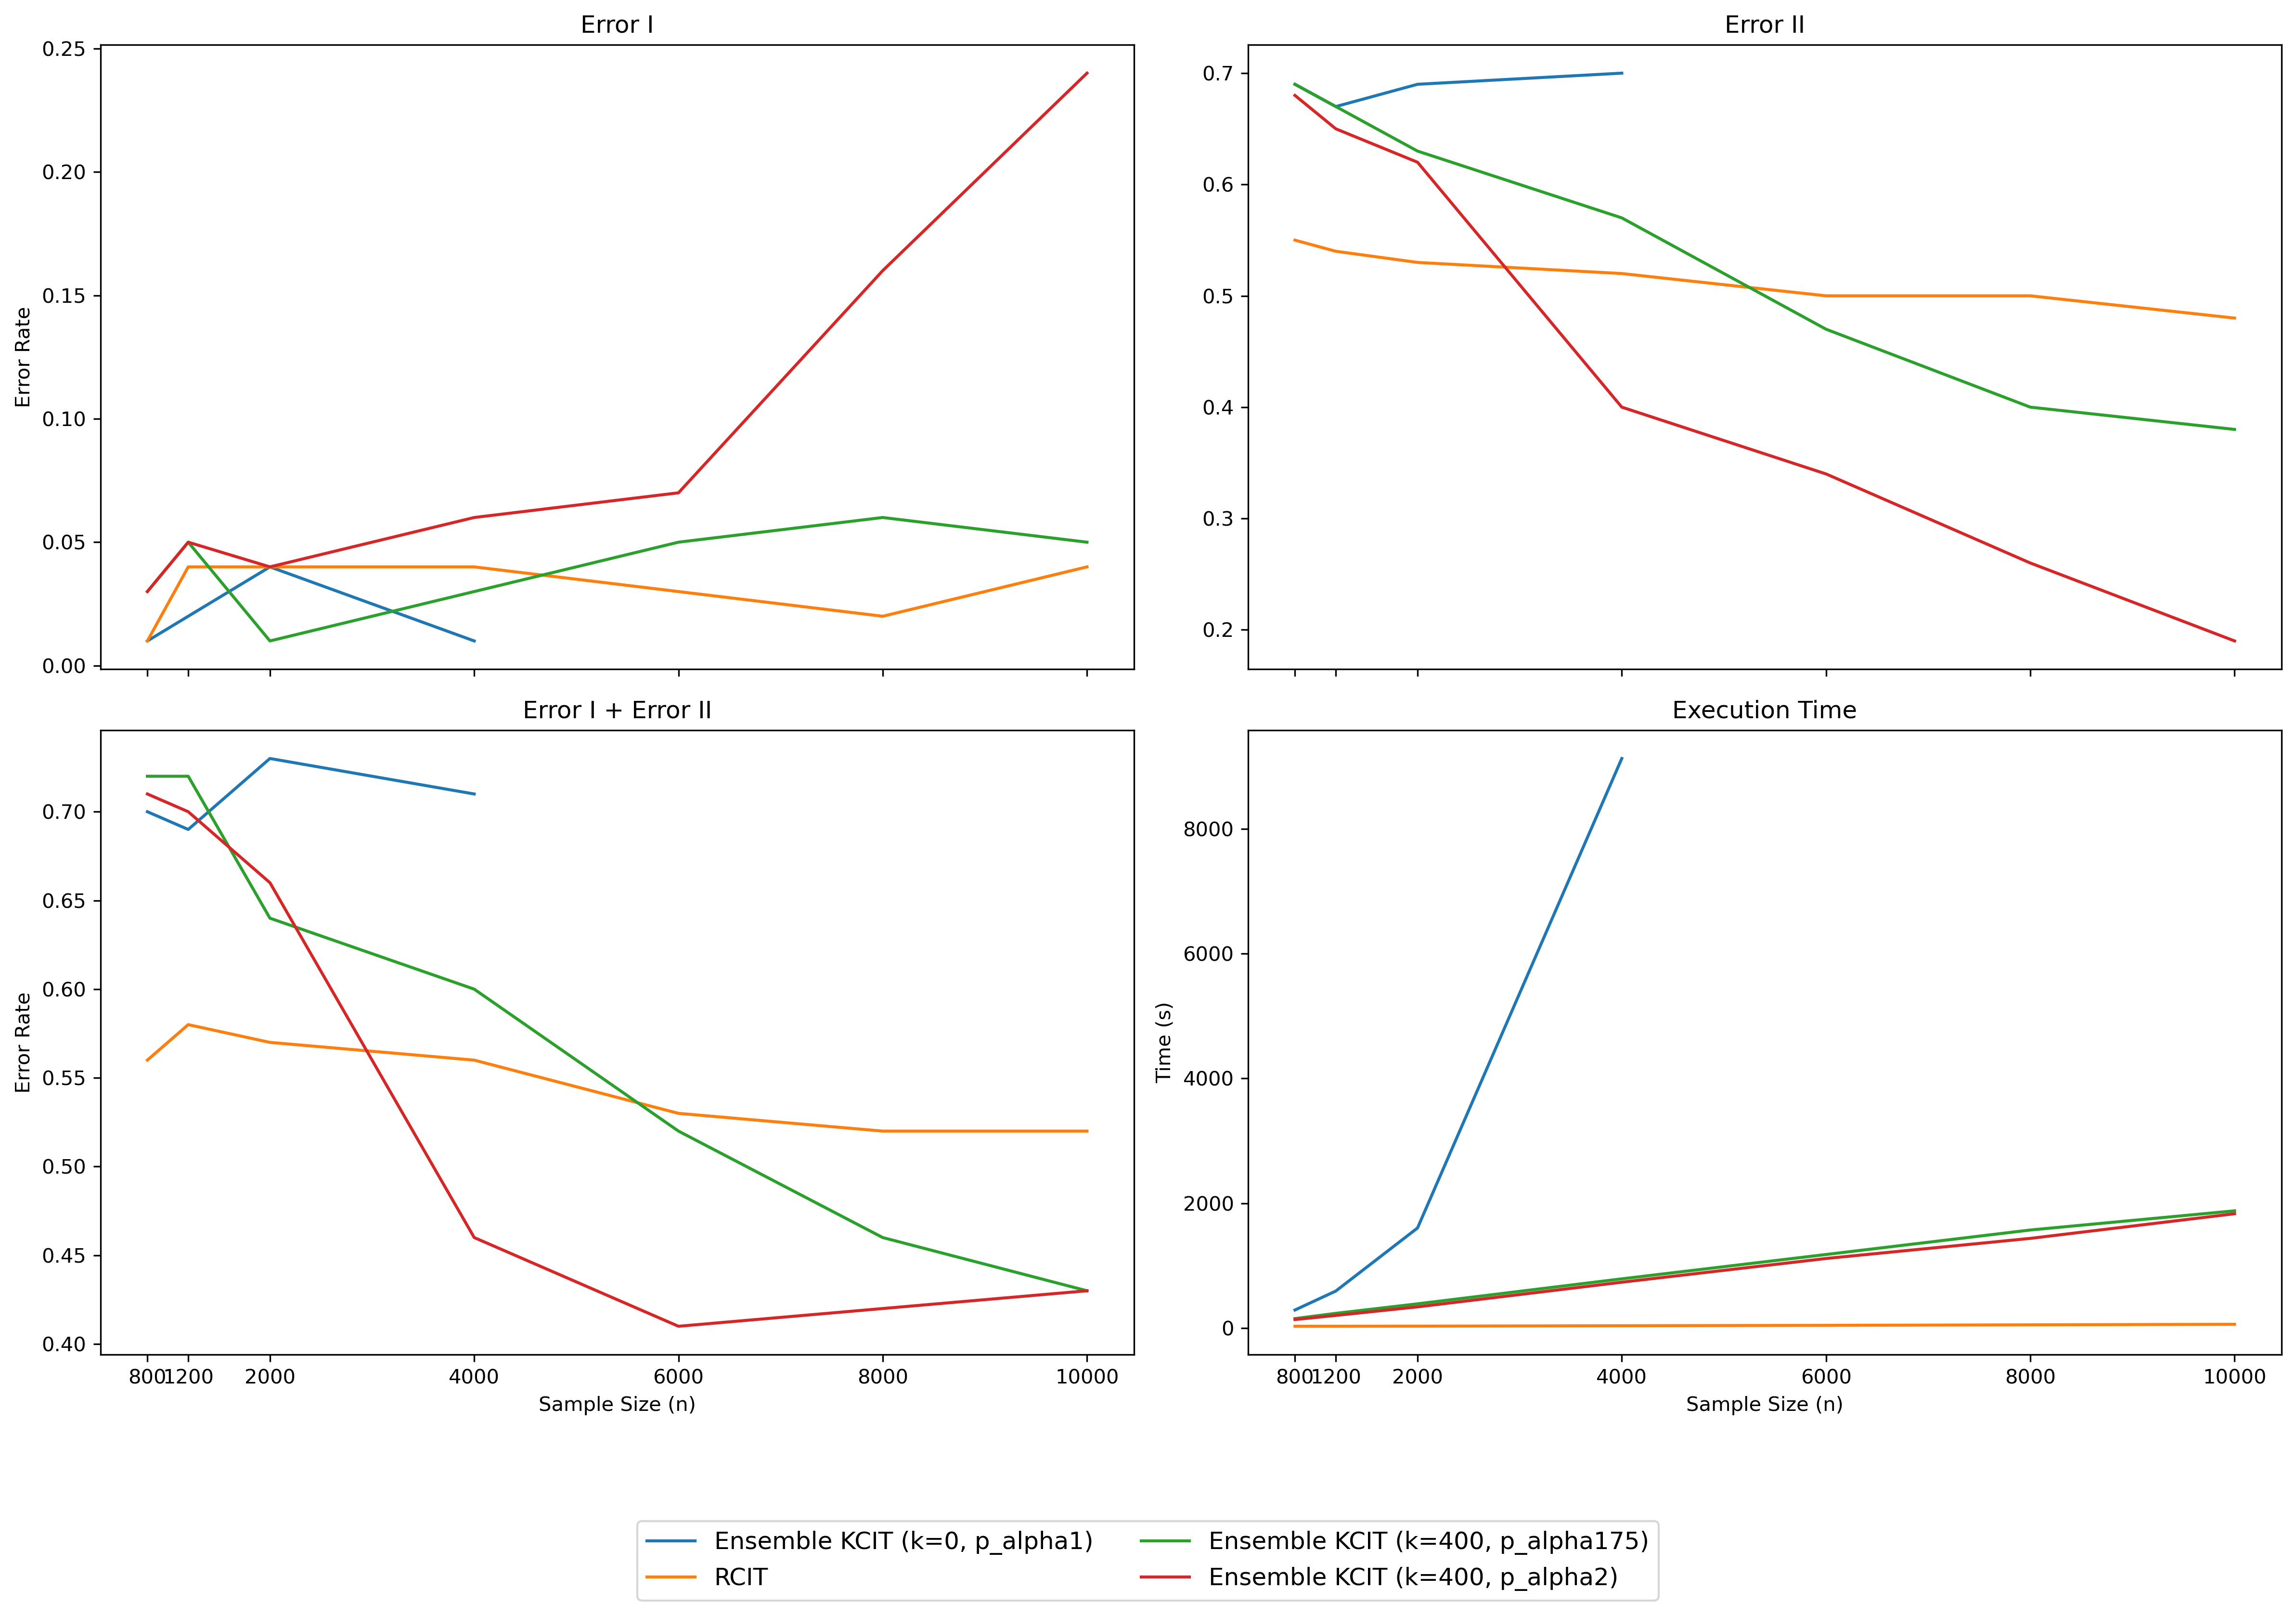

[[[0.01, 0.02, 0.04, 0.01, 1.0, 1.0, 1.0],
  [0.69, 0.67, 0.69, 0.7, 0.0, 0.0, 0.0],
  [291.26532793045044,
   595.2349021434784,
   1605.2054059505463,
   9126.3161611557,
   0.1379389762878418,
   0.1699509620666504,
   0.20660710334777832]],
 [[0.01, 0.04, 0.04, 0.04, 0.03, 0.02, 0.04],
  [0.55, 0.54, 0.53, 0.52, 0.5, 0.5, 0.48],
  [30.775758981704712,
   30.924901008605957,
   32.87982702255249,
   39.47448182106018,
   45.78052806854248,
   53.990514039993286,
   62.241233110427856]],
 [[0.03, 0.05, 0.01, 0.03, 0.05, 0.06, 0.05],
  [0.69, 0.67, 0.63, 0.57, 0.47, 0.4, 0.38],
  [153.65712118148804,
   237.8398826122284,
   390.1815059185028,
   790.5952091217041,
   1180.4663591384888,
   1572.9130749702454,
   1880.1682312488556]],
 [[0.03, 0.05, 0.04, 0.06, 0.07, 0.16, 0.24],
  [0.68, 0.65, 0.62, 0.4, 0.34, 0.26, 0.19],
  [138.46899819374084,
   204.5162980556488,
   341.5597770214081,
   736.7123529911041,
   1116.4968192577362,
   1438.6873581409454,
   1833.4852979183197]]]

In [12]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=0.75)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 449.21it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [34:06<00:00, 20.46s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [34:03<00:00, 20.43s/it]


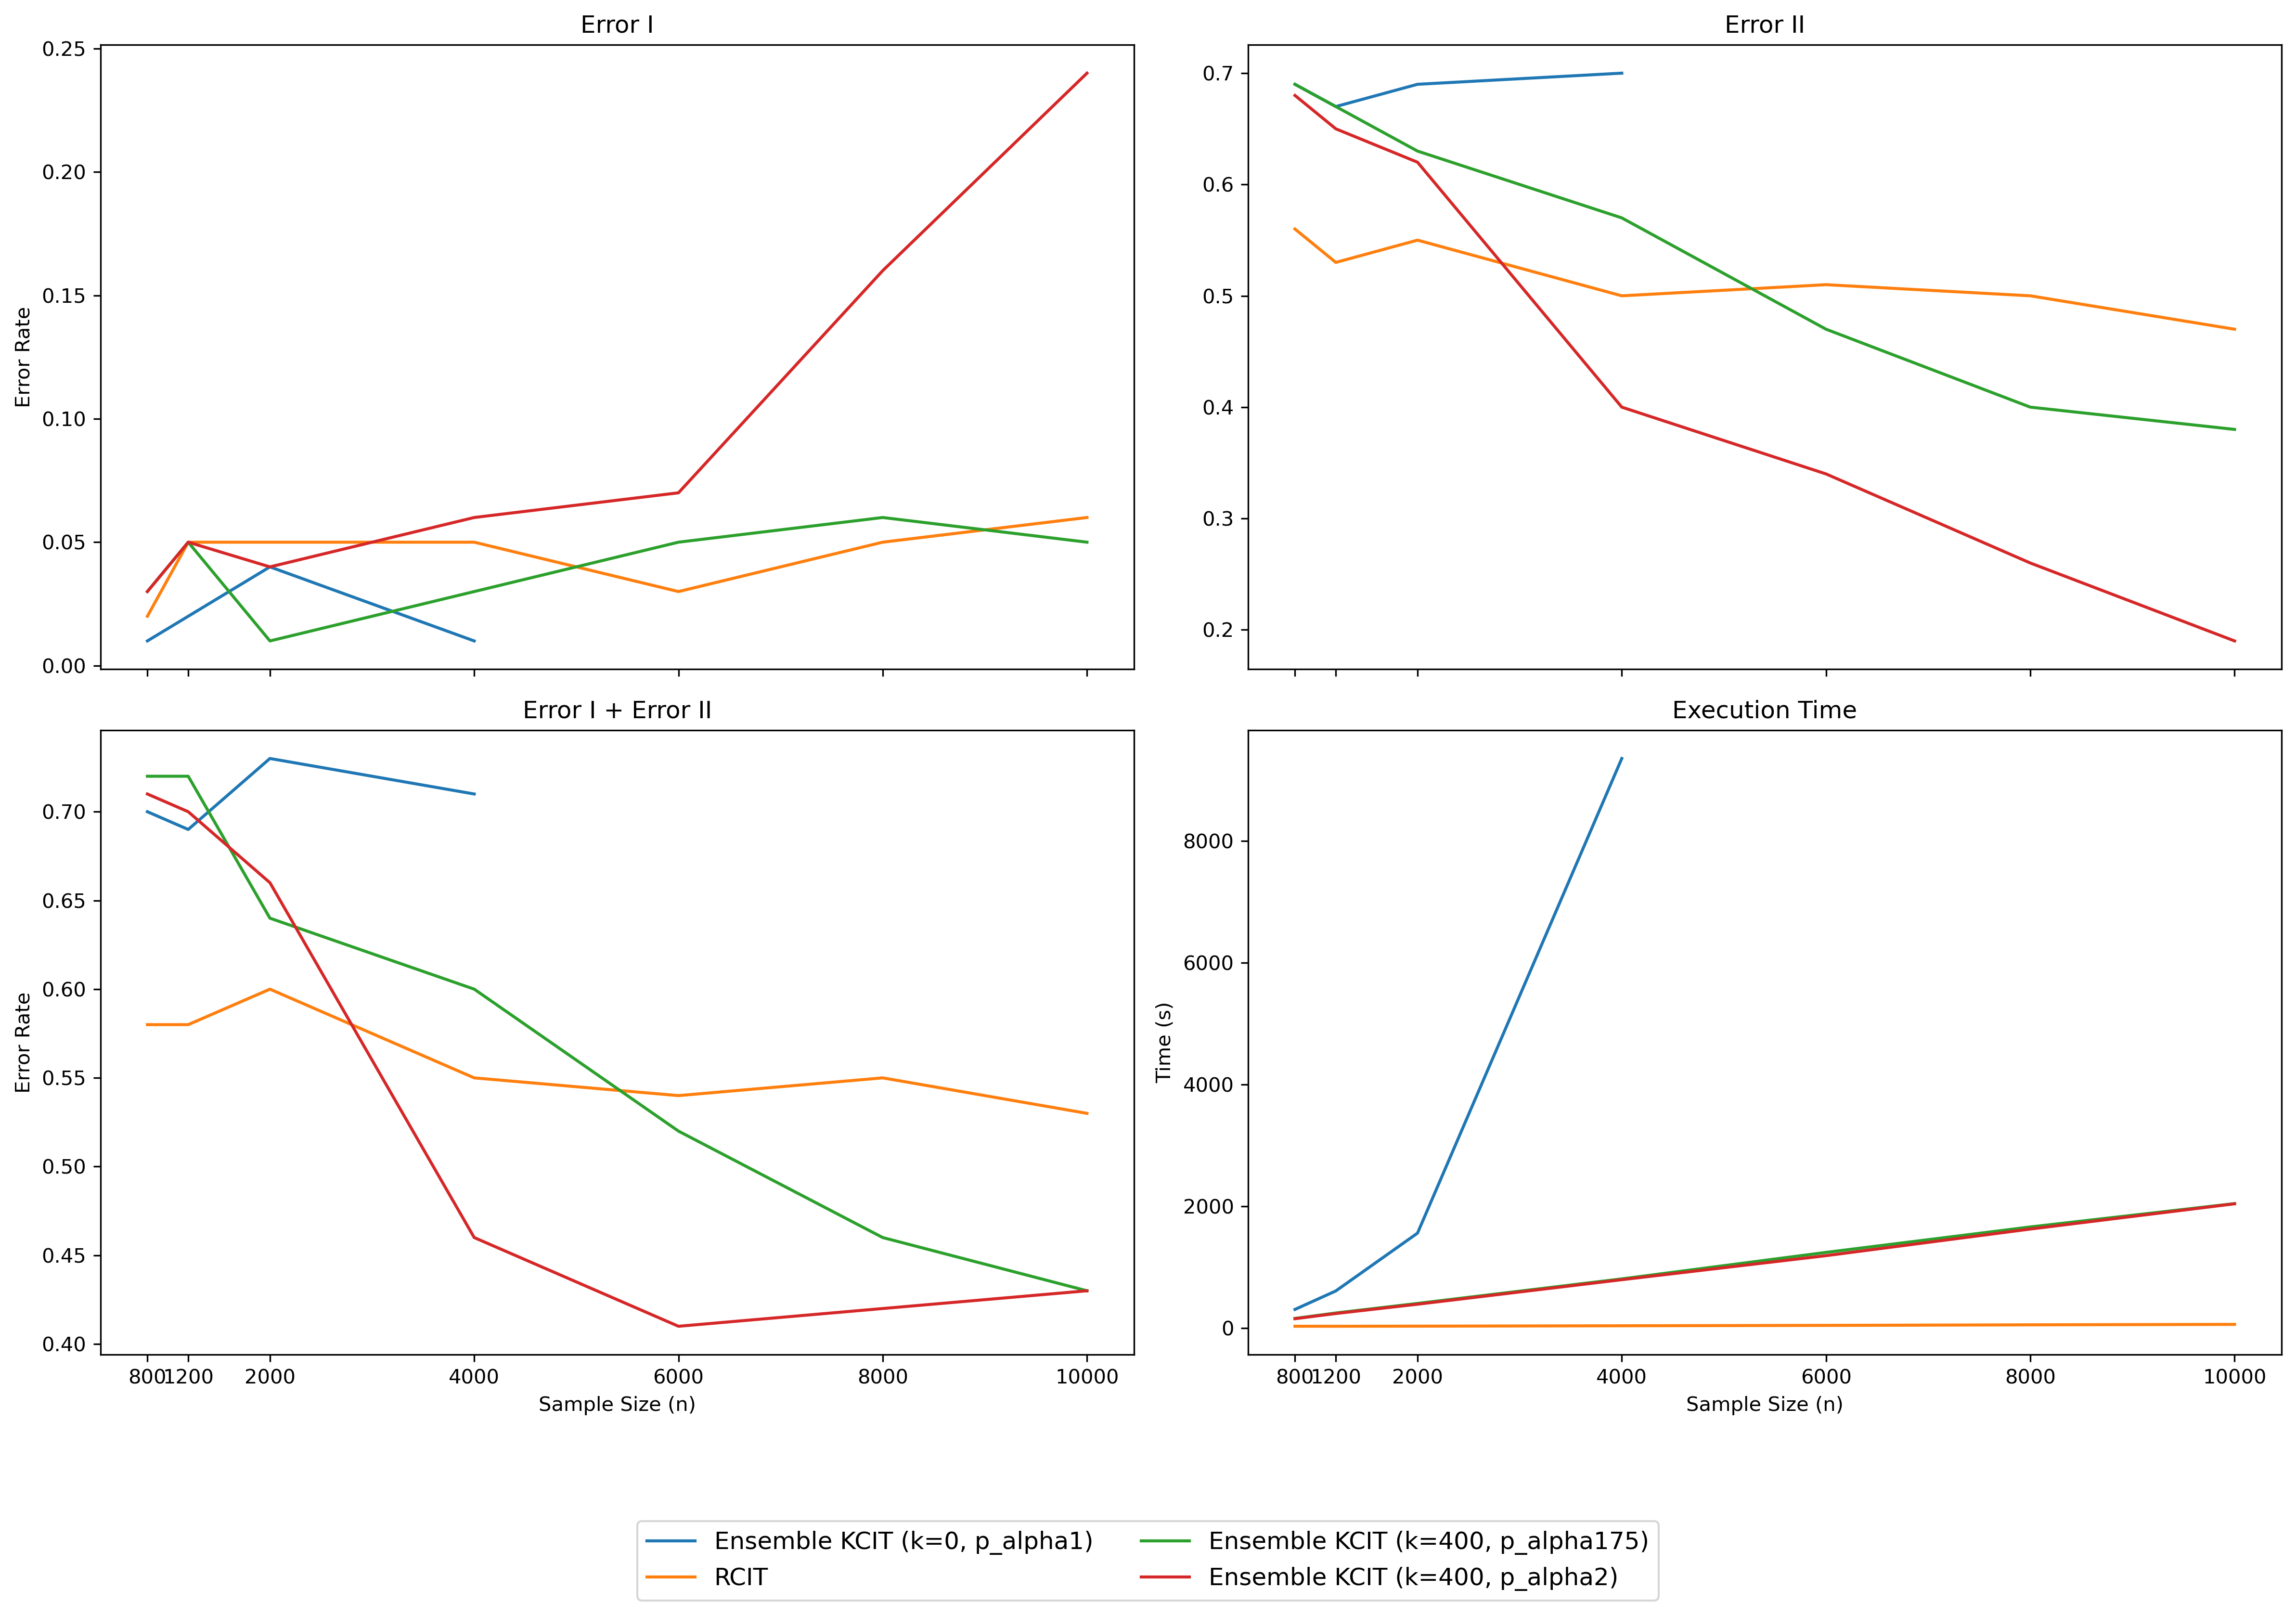

[[[0.01, 0.02, 0.04, 0.01, 1.0, 1.0, 1.0],
  [0.69, 0.67, 0.69, 0.7, 0.0, 0.0, 0.0],
  [308.69905710220337,
   612.2860481739044,
   1561.80118393898,
   9355.126789093018,
   0.1583538055419922,
   0.19649386405944824,
   0.22351384162902832]],
 [[0.02, 0.05, 0.05, 0.05, 0.03, 0.05, 0.06],
  [0.56, 0.53, 0.55, 0.5, 0.51, 0.5, 0.47],
  [32.60966515541077,
   32.20707297325134,
   33.97115969657898,
   40.29345202445984,
   46.909457206726074,
   55.81864905357361,
   63.34092879295349]],
 [[0.03, 0.05, 0.01, 0.03, 0.05, 0.06, 0.05],
  [0.69, 0.67, 0.63, 0.57, 0.47, 0.4, 0.38],
  [160.57976984977722,
   250.22793006896973,
   407.2723321914673,
   810.0653650760651,
   1245.2873380184174,
   1663.0956599712372,
   2046.499179840088]],
 [[0.03, 0.05, 0.04, 0.06, 0.07, 0.16, 0.24],
  [0.68, 0.65, 0.62, 0.4, 0.34, 0.26, 0.19],
  [156.38979506492615,
   241.5491178035736,
   394.23708486557007,
   796.9576508998871,
   1191.6900458335876,
   1628.8091070652008,
   2043.1137118339539]]]

In [14]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=0.5)
show_results(results, ensembles, n_list)
results

Ensemble (k=0, p_alpha1)


t=10000: 100%|██████████| 100/100 [00:00<00:00, 471.40it/s]


RCIT (k=1)


t=10000: 100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 100/100 [40:53<00:00, 24.54s/it]


Ensemble (k=400, p_alpha2)


t=10000: 100%|██████████| 100/100 [35:33<00:00, 21.33s/it]


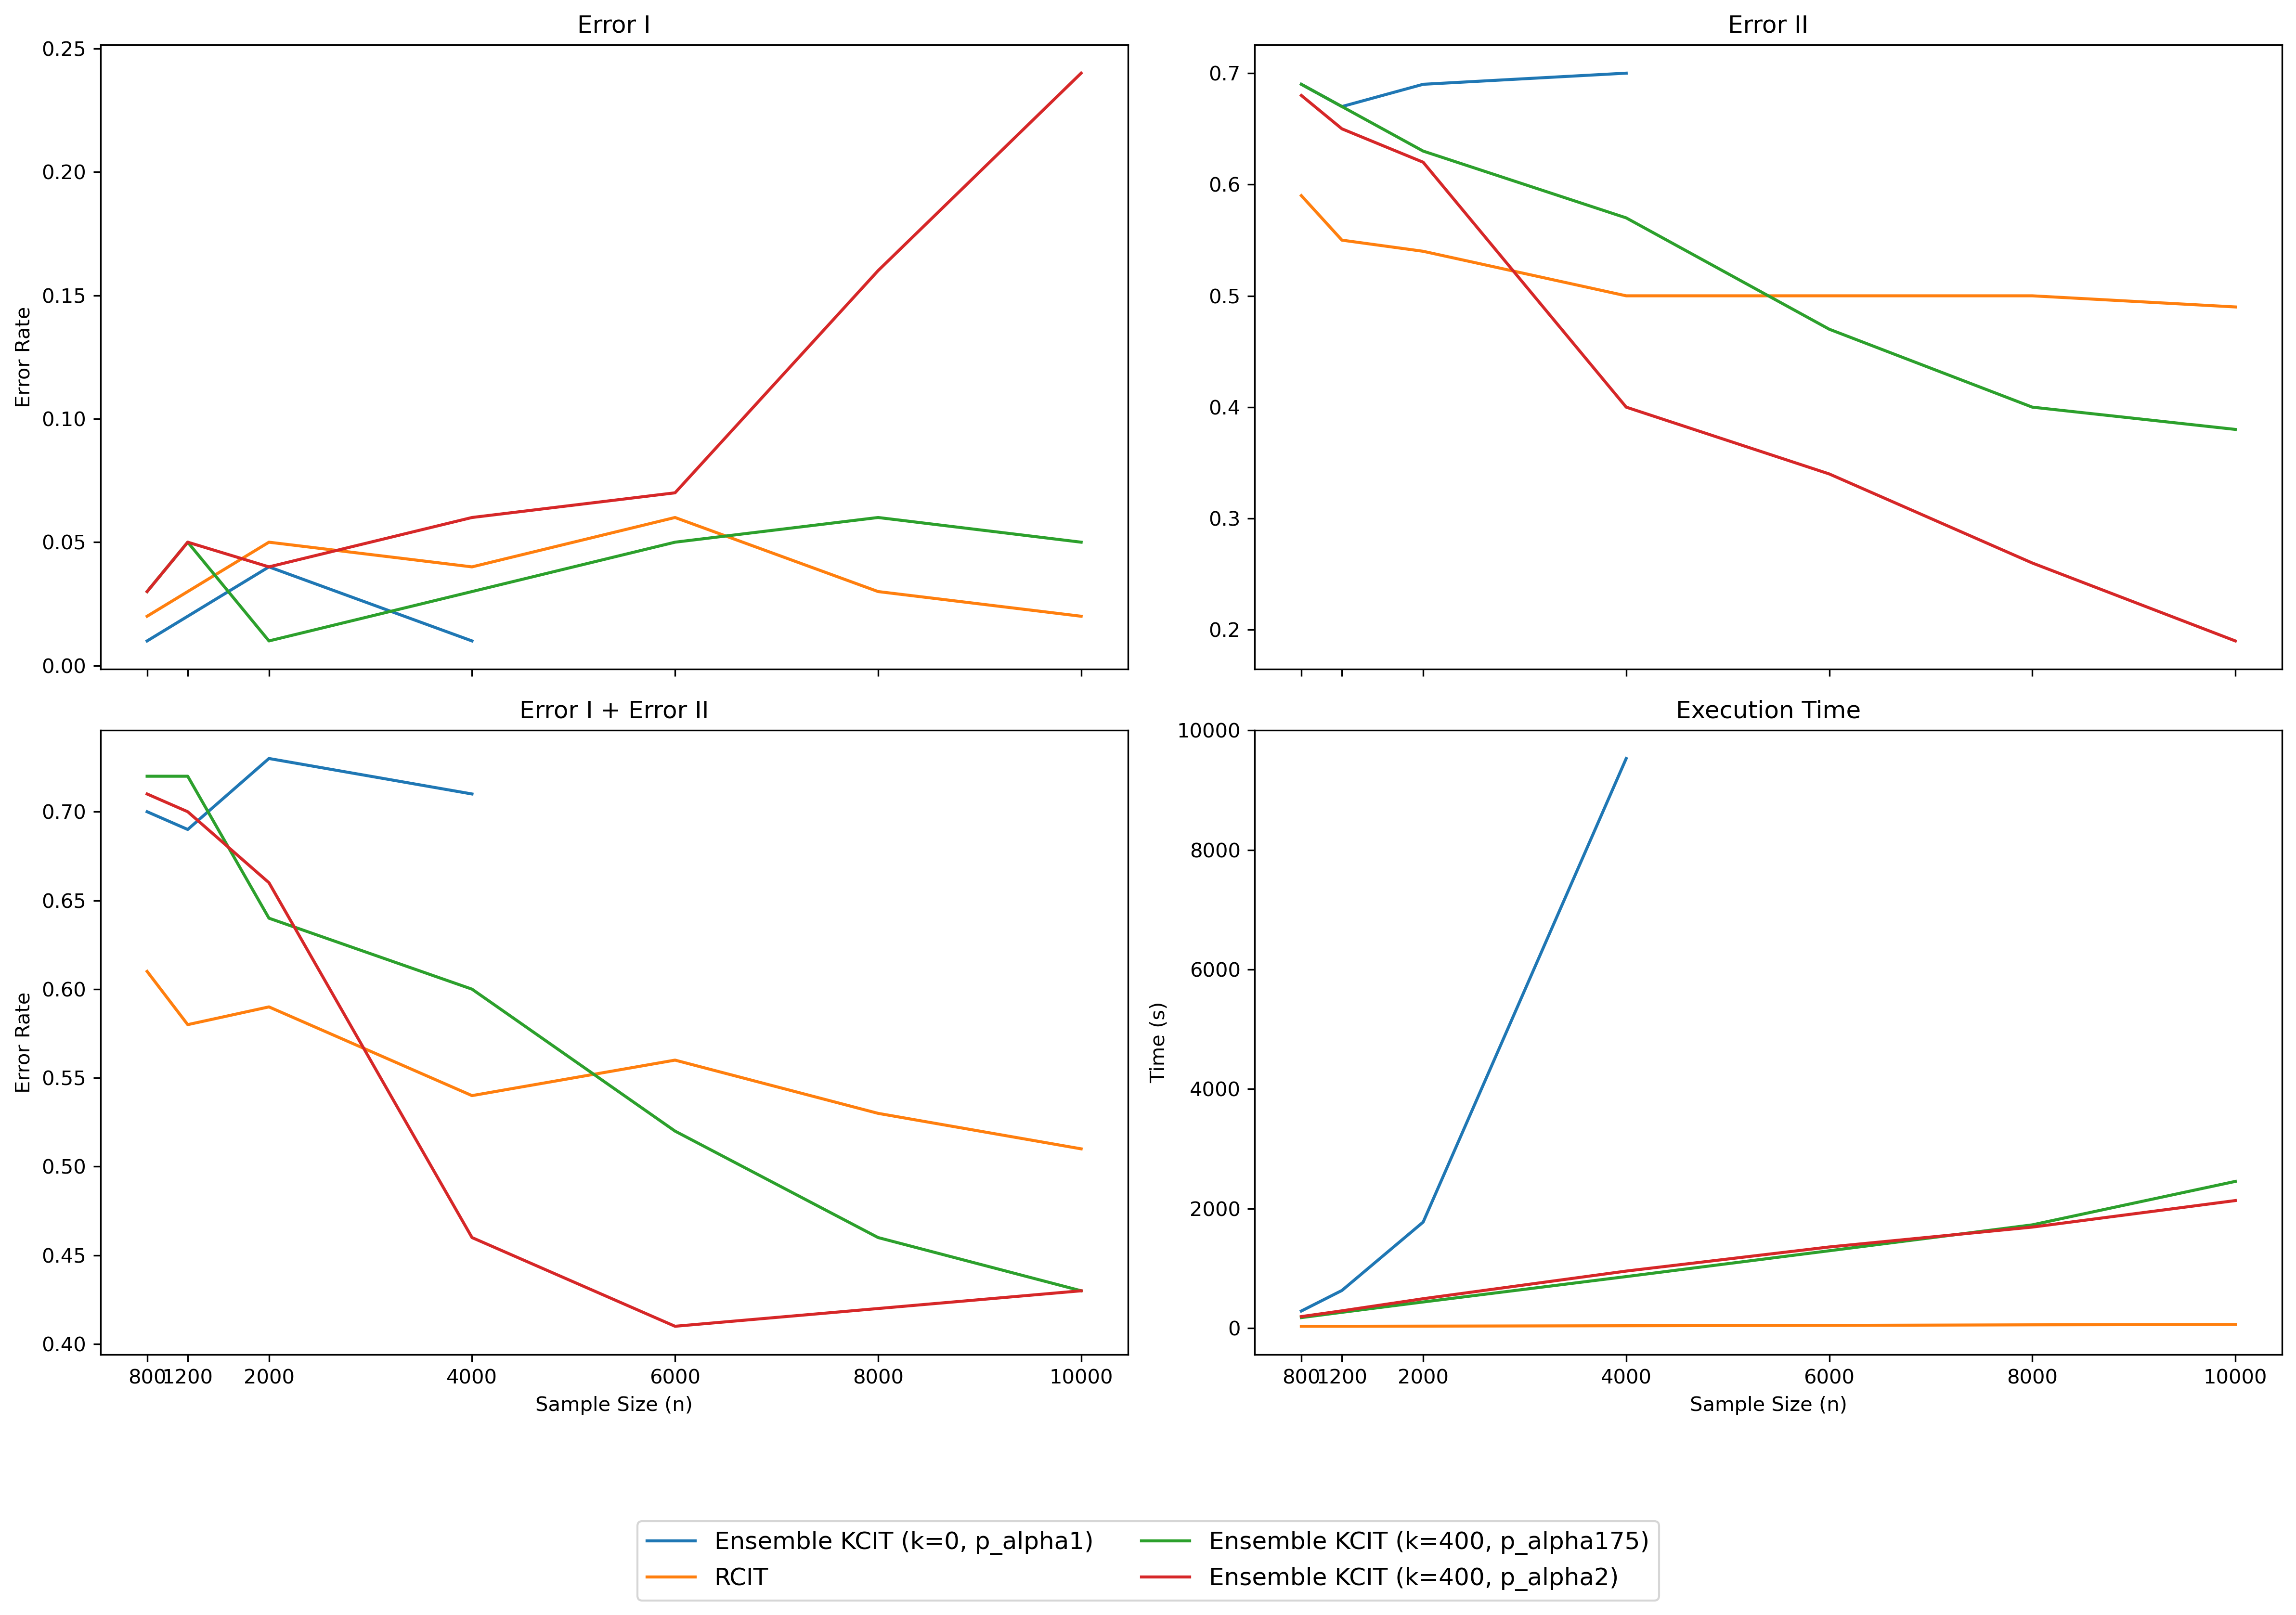

[[[0.01, 0.02, 0.04, 0.01, 1.0, 1.0, 1.0],
  [0.69, 0.67, 0.69, 0.7, 0.0, 0.0, 0.0],
  [285.0986258983612,
   629.1503291130066,
   1772.9173698425293,
   9529.274736166,
   0.15893983840942383,
   0.16808700561523438,
   0.21291184425354004]],
 [[0.02, 0.03, 0.05, 0.04, 0.06, 0.03, 0.02],
  [0.59, 0.55, 0.54, 0.5, 0.5, 0.5, 0.49],
  [30.148605346679688,
   30.000515937805176,
   32.357243061065674,
   38.53322124481201,
   44.83348107337952,
   54.06631088256836,
   60.09132528305054]],
 [[0.03, 0.05, 0.01, 0.03, 0.05, 0.06, 0.05],
  [0.69, 0.67, 0.63, 0.57, 0.47, 0.4, 0.38],
  [174.83974027633667,
   263.51349782943726,
   436.42080426216125,
   861.326418876648,
   1293.5415461063385,
   1726.7350010871887,
   2453.772203207016]],
 [[0.03, 0.05, 0.04, 0.06, 0.07, 0.16, 0.24],
  [0.68, 0.65, 0.62, 0.4, 0.34, 0.26, 0.19],
  [192.25860977172852,
   288.15790605545044,
   490.87417125701904,
   953.3536899089813,
   1356.6926860809326,
   1689.287328004837,
   2133.1187283992767]]]

In [3]:
ensembles = [(p_alpha1,0), (p_alpha1,1), (p_alpha175,400), (p_alpha2,400)]

n_list = [800, 1200, 2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, std=1.5)
show_results(results, ensembles, n_list)
results

---

Ensemble (k=1000, p_alpha2)


t=100000: 100%|██████████| 100/100 [4:11:08<00:00, 150.68s/it] 


RCIT (k=1)


t=100000: 100%|██████████| 100/100 [05:50<00:00,  3.51s/it]


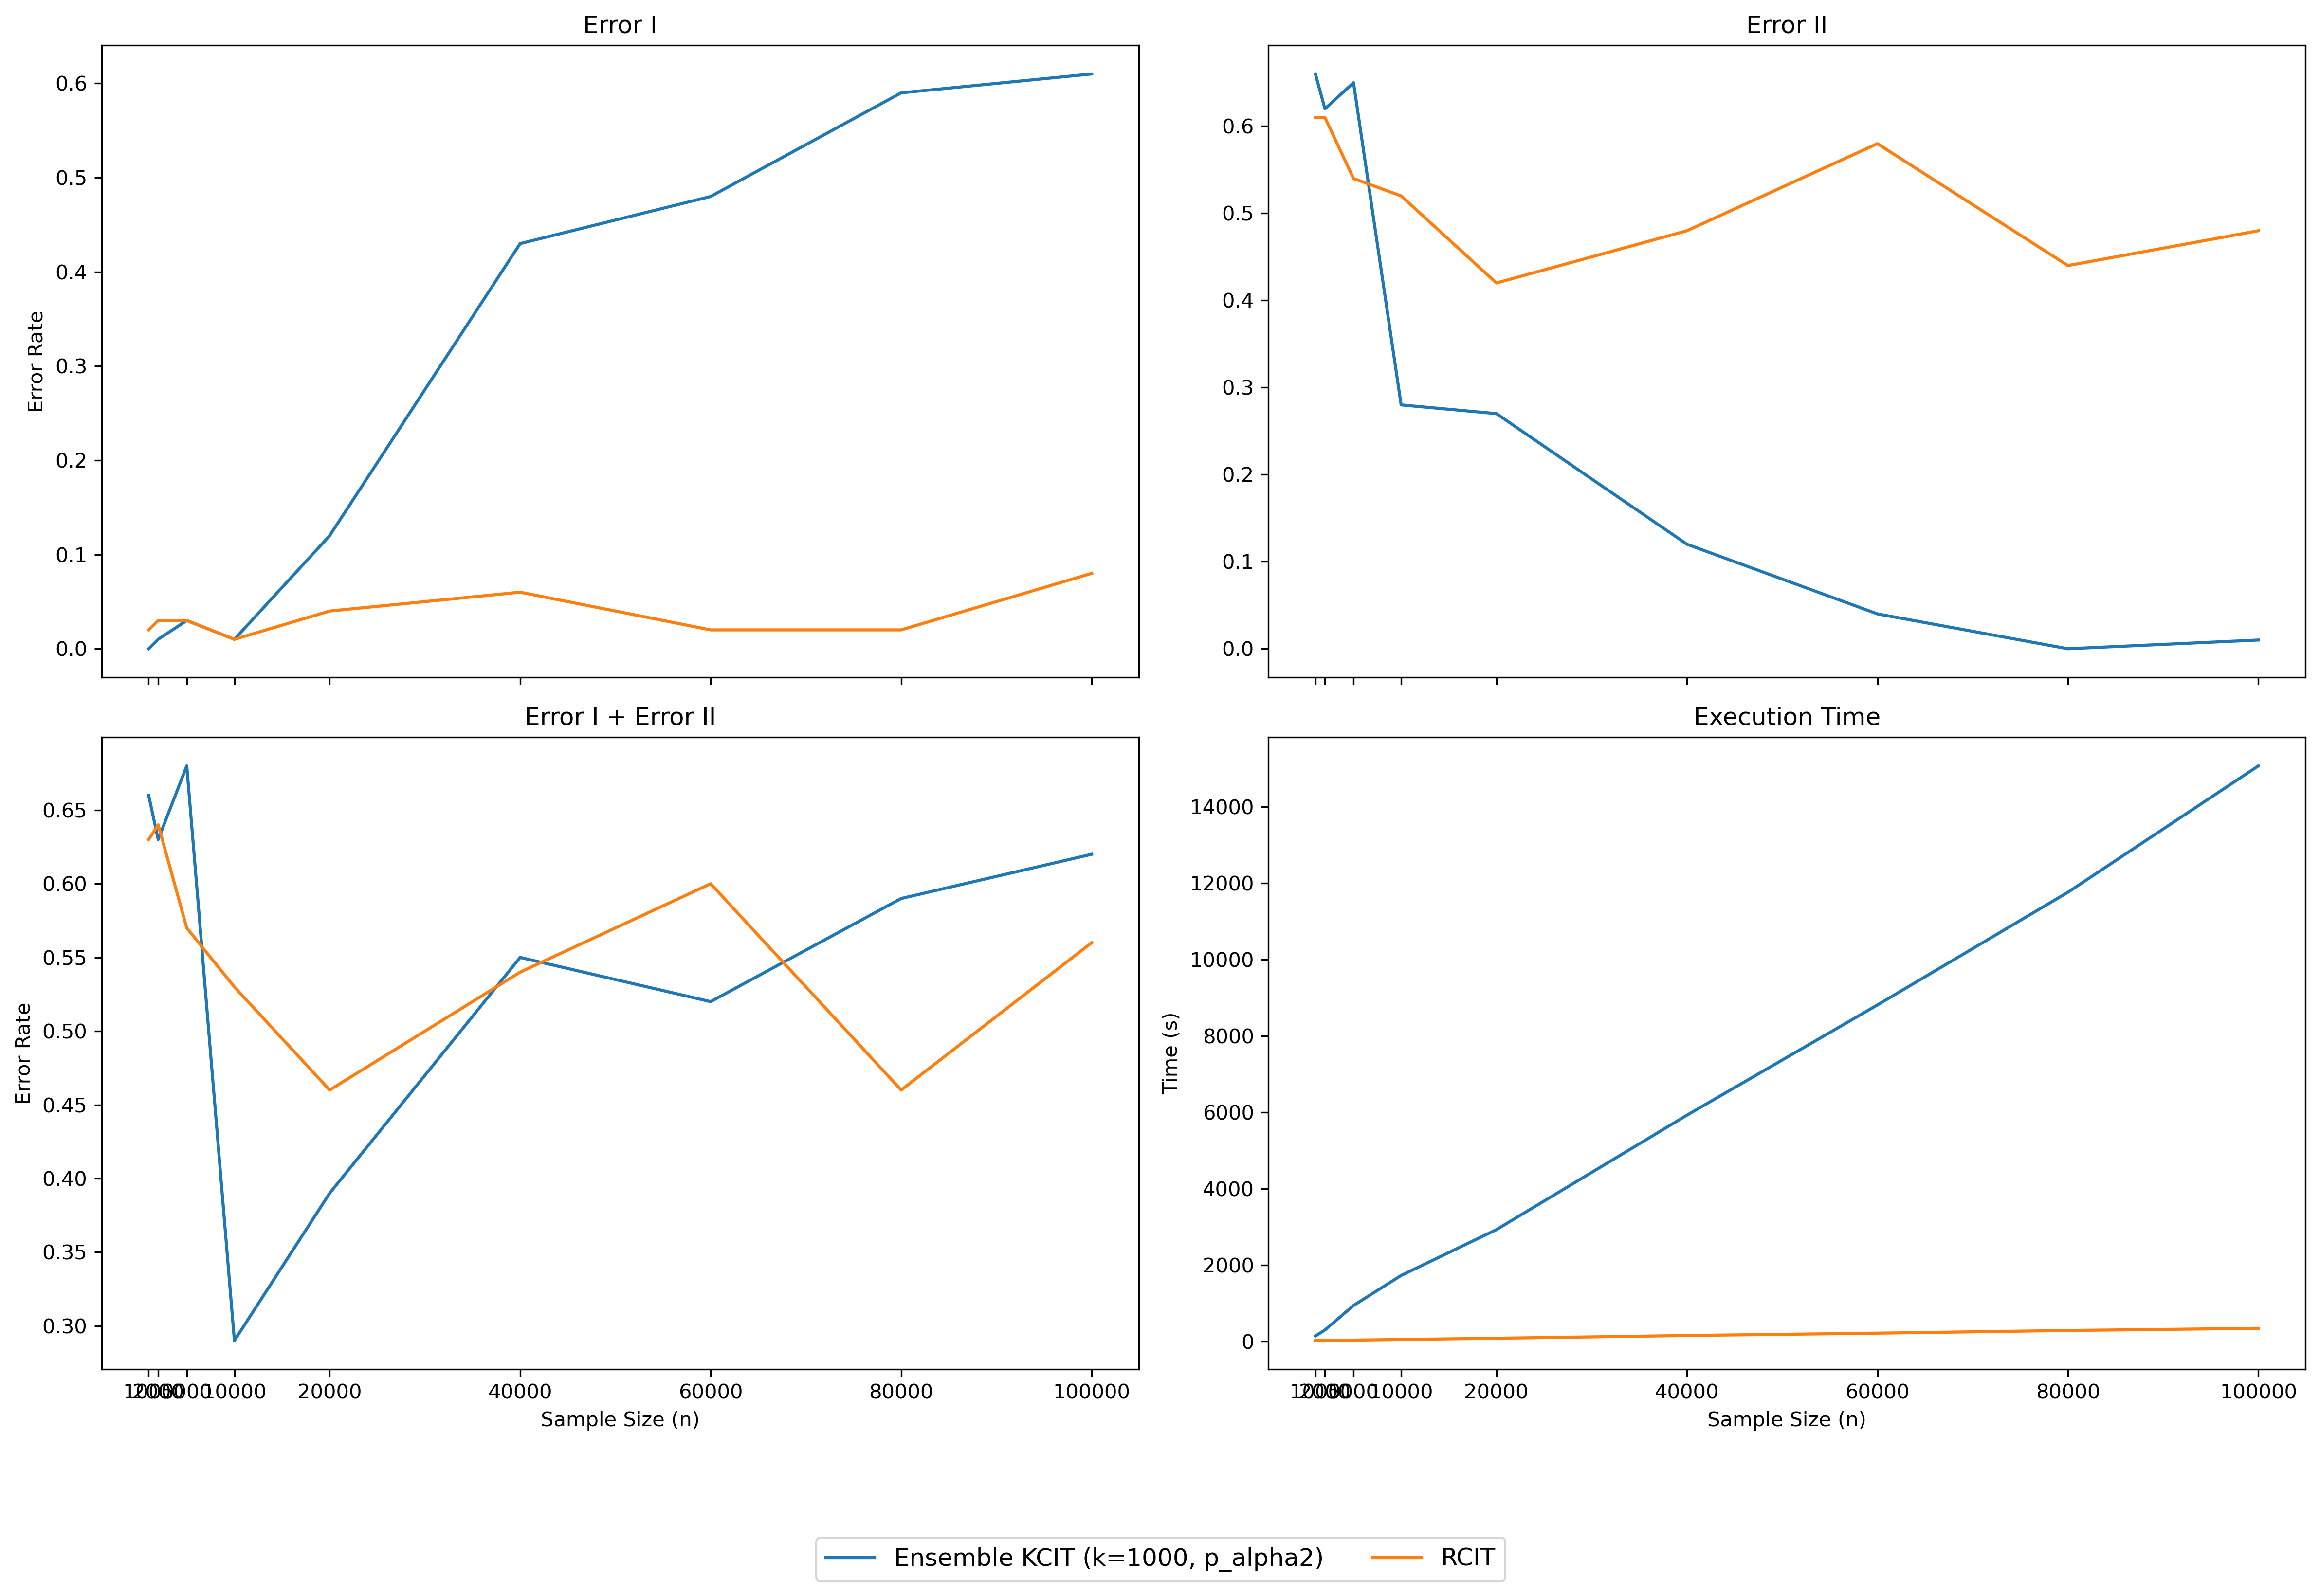

[[[0.0, 0.01, 0.03, 0.01, 0.12, 0.43, 0.48, 0.59, 0.61],
  [0.66, 0.62, 0.65, 0.28, 0.27, 0.12, 0.04, 0.0, 0.01],
  [149.2567777633667,
   307.8654170036316,
   948.3357801437378,
   1734.0093948841095,
   2932.2942159175873,
   5927.323982954025,
   8811.4927380085,
   11761.505296230316,
   15068.333221912384]],
 [[0.02, 0.03, 0.03, 0.01, 0.04, 0.06, 0.02, 0.02, 0.08],
  [0.61, 0.61, 0.54, 0.52, 0.42, 0.48, 0.58, 0.44, 0.48],
  [29.788261890411377,
   32.61804914474487,
   42.52254605293274,
   59.67429709434509,
   91.32526588439941,
   163.17387199401855,
   224.18719220161438,
   294.5197927951813,
   350.52262115478516]]]

In [7]:
ensembles = [(p_alpha2,1000), (p_alpha1,1)]

n_list = [1000, 2000, 5000, 10000, 20000, 40000, 60000, 80000, 100000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, show_progress=True)

show_results(results, ensembles, n_list)
results